# Reducing number of features

Currently, including the maskers, ARAUS dataset has 138 features per entry (133 withouth the maskers information). We are trying out different methods to reduce feature dimensions.

- PCA (feature extraction)
- Pearson's Correlation (feature filter method)
- F regression
- Forward Selection Wrapper (feature wrapper method)
- Backward Elimination Wrapper (feature wrapper method)
- Recursive Feature Elimination Wrapper (feature wrapper method)


## First, prepare data

In [28]:
import sklearn.decomposition
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os


normalise = lambda X: (X-np.mean(X,axis=0,keepdims=True))/np.std(X,axis=0,keepdims=True) # Normalise an (n,p) numpy array to mean 0, variance 1.

#### Load data file for soundscapes

Extract relevant data (features)

In [29]:
responses = pd.read_csv(os.path.join('..','data','responses_complete.csv'), dtype = {'participant':str})

In [30]:
relevant_columns = ['Savg_r','Smax_r','S05_r','S10_r','S20_r','S30_r','S40_r','S50_r','S60_r','S70_r','S80_r','S90_r','S95_r',
                         'Navg_r','Nrmc_r','Nmax_r','N05_r','N10_r','N20_r','N30_r','N40_r','N50_r','N60_r','N70_r','N80_r','N90_r','N95_r',
                         'Favg_r','Fmax_r','F05_r','F10_r','F20_r','F30_r','F40_r','F50_r','F60_r','F70_r','F80_r','F90_r','F95_r',
                         'LAavg_r','LAmin_r','LAmax_r','LA05_r','LA10_r','LA20_r','LA30_r','LA40_r','LA50_r','LA60_r','LA70_r','LA80_r','LA90_r','LA95_r',
                         'LCavg_r','LCmin_r','LCmax_r','LC05_r','LC10_r','LC20_r','LC30_r','LC40_r','LC50_r','LC60_r','LC70_r','LC80_r','LC90_r','LC95_r',
                         'Ravg_r','Rmax_r','R05_r','R10_r','R20_r','R30_r','R40_r','R50_r','R60_r','R70_r','R80_r','R90_r','R95_r',
                         'Tgavg_r','Tavg_r','Tmax_r','T05_r','T10_r','T20_r','T30_r','T40_r','T50_r','T60_r','T70_r','T80_r','T90_r','T95_r',
                         'M00005_0_r','M00006_3_r','M00008_0_r','M00010_0_r','M00012_5_r','M00016_0_r','M00020_0_r','M00025_0_r','M00031_5_r','M00040_0_r',
                         'M00050_0_r','M00063_0_r','M00080_0_r','M00100_0_r','M00125_0_r','M00160_0_r','M00200_0_r','M00250_0_r','M00315_0_r','M00400_0_r',
                         'M00500_0_r','M00630_0_r','M00800_0_r','M01000_0_r','M01250_0_r','M01600_0_r','M02000_0_r','M02500_0_r','M03150_0_r','M04000_0_r',
                         'M05000_0_r','M06300_0_r','M08000_0_r','M10000_0_r','M12500_0_r','M16000_0_r','M20000_0_r', 'masker_bird' , 'masker_construction',  
                         'masker_silence',  'masker_traffic','masker_water',  'masker_wind']

In [31]:
features=responses[relevant_columns]
Xs=features.values
feature_names=features.columns
print(feature_names)
print(Xs.shape)
print(Xs)

Index(['Savg_r', 'Smax_r', 'S05_r', 'S10_r', 'S20_r', 'S30_r', 'S40_r',
       'S50_r', 'S60_r', 'S70_r',
       ...
       'M10000_0_r', 'M12500_0_r', 'M16000_0_r', 'M20000_0_r', 'masker_bird',
       'masker_construction', 'masker_silence', 'masker_traffic',
       'masker_water', 'masker_wind'],
      dtype='object', length=138)
(27255, 138)
[[1.37 1.97 1.69 ... 0.   0.   0.  ]
 [1.68 1.97 1.87 ... 0.   0.   0.  ]
 [2.23 2.36 2.29 ... 0.   1.   0.  ]
 ...
 [1.23 1.56 1.43 ... 0.   0.   0.  ]
 [1.29 1.57 1.47 ... 0.   0.   0.  ]
 [1.37 1.97 1.69 ... 0.   0.   0.  ]]


Normalise the feature matrix

In [32]:
Xs_norm  = normalise(Xs)
print(Xs_norm)

[[-0.1163838   0.27868504  0.22859882 ... -0.42861796 -0.43041569
  -0.42861796]
 [ 1.16068473  0.27868504  0.81183485 ... -0.42861796 -0.43041569
  -0.42861796]
 [ 3.42645147  1.34137396  2.17271891 ... -0.42861796  2.32333539
  -0.42861796]
 ...
 [-0.69312443 -0.83850074 -0.61385321 ... -0.42861796 -0.43041569
  -0.42861796]
 [-0.44594987 -0.81125231 -0.48424521 ... -0.42861796 -0.43041569
  -0.42861796]
 [-0.1163838   0.27868504  0.22859882 ... -0.42861796 -0.43041569
  -0.42861796]]


## Principal component analysis of features (PCA)

Principal Component Analysis (PCA) is a dimensionality reduction technique used in the field of machine learning and statistics. The main goal of PCA is to transform high-dimensional data into a lower-dimensional representation, capturing as much of the original variability as possible. This is achieved by finding the principal components of the data.

We are not interested in transforming our dimensions, just on finding the subset of features that generates more variance in the output, so this method is not what we need

### Perform PCA
Perform PCA on the normalised feature matrix. We use `sklearn.decomposition.PCA` to perform the PCA via singular value decomposition of the sample covariance matrix, and get the following outputs of the PCA:
- `Us` : The principal components matrix
- `Ls_norm` : Percentages of variance explained by each eigenvalue, in decreasing order
- `Ys` : The PCA-transformed data matrix


In [8]:
Xs_PCA = sklearn.decomposition.PCA().fit(Xs_norm)
Us, Ls_norm, Ys= Xs_PCA.components_, Xs_PCA.explained_variance_ratio_, Xs_PCA.transform(Xs_norm)
print(Us.shape, Ls_norm.shape, Ys.shape)

(138, 138) (138,) (27255, 138)


Extract out first `n_components` principal components (i.e. those that explain 90% of the variance) as a truncated PCA-transformed data matrix `Ys`

In [9]:
n_components = np.sum(np.cumsum(Ls_norm) < 0.96)

print(f'To keep first {n_components} components if we want to explain 95% of the variance.')

To keep first 18 components if we want to explain 95% of the variance.


We can check which features mostly contribute to the first component

In [10]:

top_features_pc1 = np.argsort(np.abs(Us[:, 0]))[::-1][:20] 
print("Top 20 features for PC1:", top_features_pc1)
feature_names_pc1 = features.columns[top_features_pc1]
print("Feature names for PC1:", feature_names_pc1)

Top 20 features for PC1: [116   1 120 118 119 113 112   2 100   5  99  18 117 101   7  35  17 108
  28 111]
Feature names for PC1: Index(['M00630_0_r', 'Smax_r', 'M01600_0_r', 'M01000_0_r', 'M01250_0_r',
       'M00315_0_r', 'M00250_0_r', 'S05_r', 'M00016_0_r', 'S30_r',
       'M00012_5_r', 'N20_r', 'M00800_0_r', 'M00020_0_r', 'S50_r', 'F60_r',
       'N10_r', 'M00100_0_r', 'Fmax_r', 'M00200_0_r'],
      dtype='object')


## Pearson's Correlation

A statistic that measures the linear correlation between two variables, which are both continuous. It varies from -1 to +1, where +1 corresponds to positive linear correlation, 0 to no linear correlation, and −1 to negative linear correlation.

In [12]:
# Function to normalize values to have minimum at -1 and maximum at 1

def normalize_min_max(X):
    min_vals = np.min(X, axis=0, keepdims=True)
    max_vals = np.max(X, axis=0, keepdims=True)
    normalized = -1 + 2 * (X - min_vals) / (max_vals - min_vals)
    return normalized

import seaborn as sns

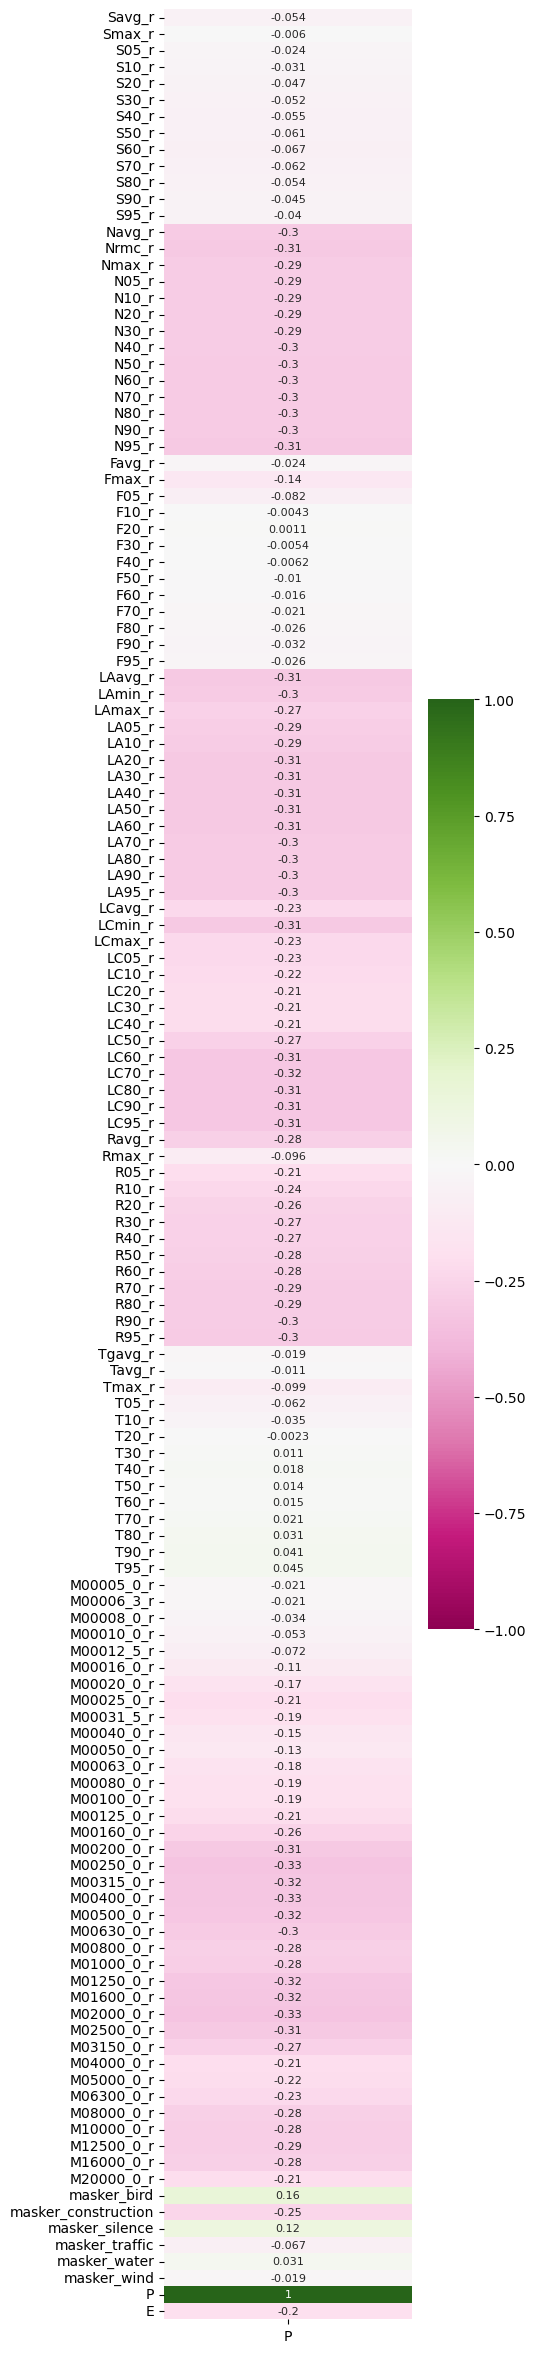

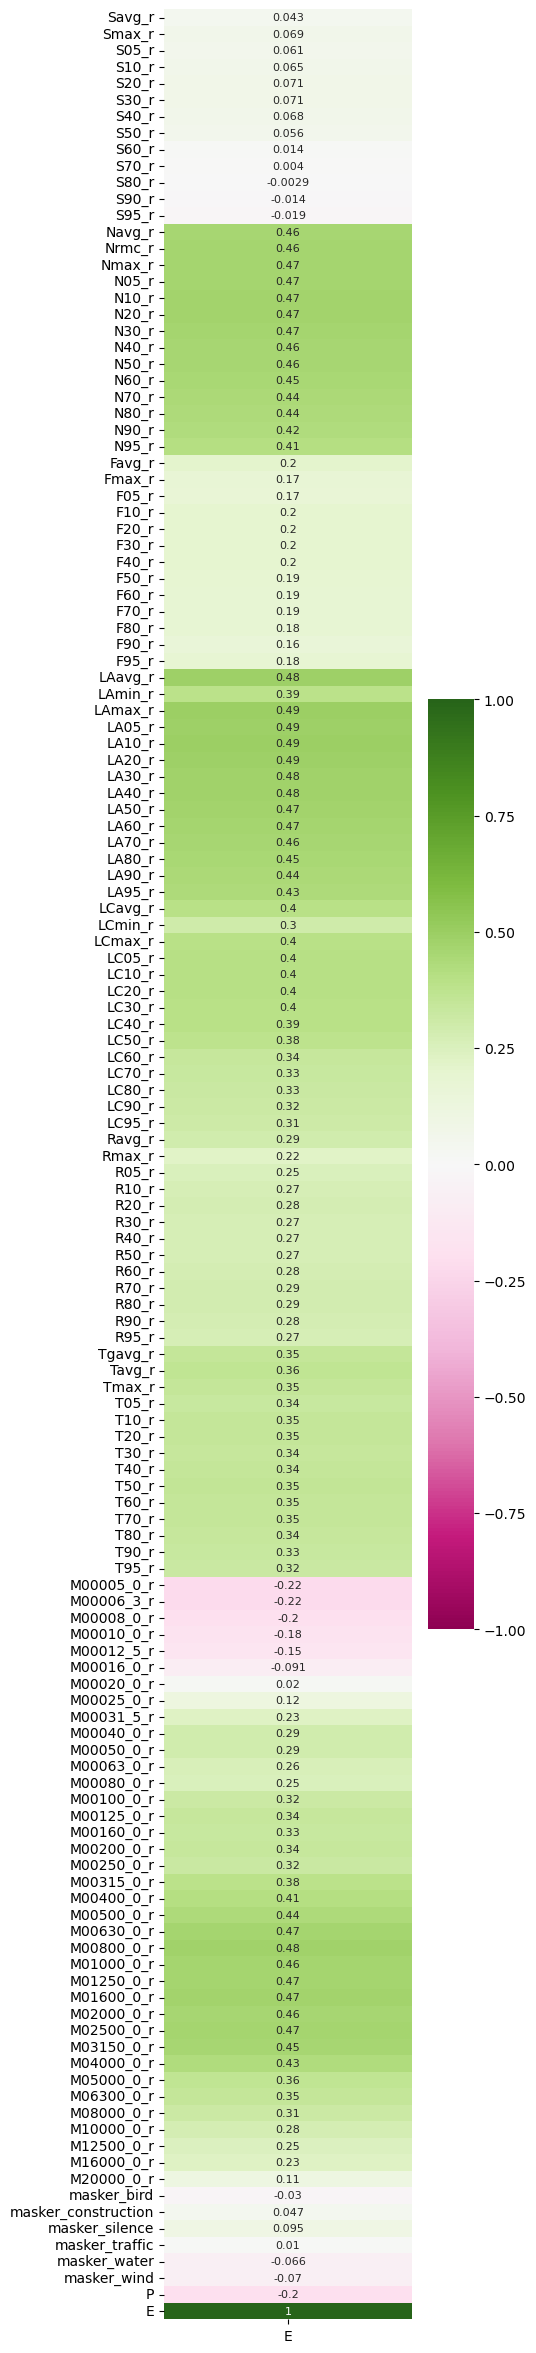

In [20]:
X=responses[relevant_columns].values # Features
Y_p=responses["P_ground_truth"].values # Ground truth Pleasantness 
Y_e=responses["E_ground_truth"].values # Ground truth Eventfulness

# Normalize all data
X_norm=normalize_min_max(X)
Y_p_norm=normalize_min_max(Y_p)
Y_e_norm=normalize_min_max(Y_e)

# Generate dataframe with data
data = pd.DataFrame(X_norm, columns=relevant_columns)
data['P'] = Y_p_norm
data['E'] = Y_e_norm

# Compute pearson's r for P and E #
target_correlation = data.corr()
target_correlation_P = target_correlation[['P']] # we only care about the target variable P
target_correlation_E = target_correlation[['E']] # we only care about the target variable E

# Plot
plt.figure(figsize=(4,30))
font_size=8
ax=sns.heatmap(target_correlation_P, annot=True, cmap="PiYG", vmin=-1, vmax=1,center=0,annot_kws={"fontsize": font_size})
plt.show()
plt.figure(figsize=(4,30))
sns.heatmap(target_correlation_E, annot=True, cmap="PiYG", vmin=-1, vmax=1,center=0,annot_kws={"fontsize": font_size})
plt.show()

Correlation coefficients whose magnitude are between 0.5 and 0.7 indicate variables which can be considered moderately correlated, thus we set the threshold value to 0.5. We check and we see that no variable correlates more than 0.5, therefore, we cannot reduce the set of variables acoording to Pearson's Correlation

In [19]:
# extract the most correlated features with the output variable
corrP= target_correlation_P[abs(target_correlation_P)>0.5].dropna()
print(corrP)
corrE= target_correlation_E[abs(target_correlation_E)>0.5].dropna()
print(corrE)

     P
P  1.0
     E
E  1.0


## F regression for feature selection

Select 20 features that generate tha maximum variance

In [22]:
from sklearn.feature_selection import f_regression, SelectKBest

Y_train=responses["P_ground_truth"]
X_train=pd.DataFrame(Xs,columns=feature_names)

# Assuming X_train and Y_train are your training data
k_best_selector = SelectKBest(f_regression, k=20)
X_train_selected = k_best_selector.fit_transform(X_train, Y_train)

# Get the indices of the selected features
top_features_indices = k_best_selector.get_support(indices=True)
top_features = X_train.columns[top_features_indices]

print("Top 20 features:", top_features)

Top 20 features: Index(['N95_r', 'LA20_r', 'LA30_r', 'LA40_r', 'LA50_r', 'LA60_r', 'LCmin_r',
       'LC60_r', 'LC70_r', 'LC80_r', 'LC90_r', 'LC95_r', 'M00200_0_r',
       'M00250_0_r', 'M00315_0_r', 'M00400_0_r', 'M00500_0_r', 'M01250_0_r',
       'M01600_0_r', 'M02000_0_r'],
      dtype='object')


In [23]:
from sklearn.feature_selection import f_regression, SelectKBest

Y_train=responses["E_ground_truth"]
X_train=pd.DataFrame(Xs,columns=feature_names)

# Assuming X_train and Y_train are your training data
k_best_selector = SelectKBest(f_regression, k=20)
X_train_selected = k_best_selector.fit_transform(X_train, Y_train)

# Get the indices of the selected features
top_features_indices = k_best_selector.get_support(indices=True)
top_features = X_train.columns[top_features_indices]

print("Top 20 features:", top_features)

Top 20 features: Index(['Nrmc_r', 'Nmax_r', 'N05_r', 'N10_r', 'N20_r', 'N30_r', 'LAavg_r',
       'LAmax_r', 'LA05_r', 'LA10_r', 'LA20_r', 'LA30_r', 'LA40_r', 'LA50_r',
       'LA60_r', 'M00630_0_r', 'M00800_0_r', 'M01250_0_r', 'M01600_0_r',
       'M02500_0_r'],
      dtype='object')


## Forward selection wrapper
Starting from Scratch: Begin with an empty set of features and iteratively add one feature at a time.
Model Evaluation: At each step, train and evaluate the machine learning model using the selected features.
Stopping Criterion: Continue until a predefined stopping criterion is met, such as a maximum number of features or a significant drop in performance.

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Replace this with your dataset and labels
X = X_norm
y = np.where(Y_p_norm >= 0, "pleasant", "unpleasant") #Y_e_norm

# Initialize an empty list to store selected feature indices
selected_features = []

# Define the machine learning model (in this case, a Random Forest Classifier)
model = RandomForestClassifier()

# Define the number of features you want to select
num_features_to_select = 20

while len(selected_features) < num_features_to_select:
    best_score = -1
    best_feature = None

    for feature_idx in range(X.shape[1]):
        print("feature_idx ", feature_idx)
        if feature_idx in selected_features:
            continue

        # Try adding the feature to the selected set
        candidate_features = selected_features + [feature_idx]
        print("candidate_features ", candidate_features)

        # Evaluate the model's performance using cross-validation
        scores = cross_val_score(model, X[:, candidate_features], y, cv=5, scoring='accuracy')
        mean_score = np.mean(scores)

        print("mean vs best scores ", mean_score, best_score)

        # Keep track of the best-performing feature
        if mean_score > best_score:
            best_score = mean_score
            best_feature = feature_idx
        print("selected_features ", selected_features)
        print("best_feature ", best_feature)
        print("----------------------")

    if best_feature is not None:
        selected_features.append(best_feature)
        print(f"Selected Feature {len(selected_features)}: {best_feature}, Mean Accuracy: {best_score:.4f}")

print("Selected feature indices:", selected_features)

feature_idx  0
candidate_features  [0]
mean vs best scores  0.5632727939827554 -1
selected_features  []
best_feature  0
----------------------
feature_idx  1
candidate_features  [1]
mean vs best scores  0.5592368372775637 0.5632727939827554
selected_features  []
best_feature  0
----------------------
feature_idx  2
candidate_features  [2]
mean vs best scores  0.5646670335718216 0.5632727939827554
selected_features  []
best_feature  2
----------------------
feature_idx  3
candidate_features  [3]
mean vs best scores  0.561621720785177 0.5646670335718216
selected_features  []
best_feature  2
----------------------
feature_idx  4
candidate_features  [4]
mean vs best scores  0.5623188405797102 0.5646670335718216
selected_features  []
best_feature  2
----------------------
feature_idx  5
candidate_features  [5]
mean vs best scores  0.5626857457347276 0.5646670335718216
selected_features  []
best_feature  2
----------------------
feature_idx  6
candidate_features  [6]
mean vs best scores  0.5

KeyboardInterrupt: 

## Backward elimination

Starting with Everything: Start with all available features.
Iterative Removal: In each iteration, remove the least important feature and evaluate the model.
Stopping Criterion: Continue until a stopping condition is met.

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Replace this with your dataset and labels
X = X_norm
y = np.where(Y_p_norm >= 0, "pleasant", "unpleasant") #Y_e_norm

# Define the machine learning model (in this case, a Random Forest Classifier)
model = RandomForestClassifier()

# Initialize a list with all feature indices
all_features = list(range(X.shape[1]))

# Define the minimum number of features you want to retain
min_features_to_retain = 20

while len(all_features) > min_features_to_retain:
    worst_score = 1.0  # Initialize with a high value
    worst_feature = None

    for feature_idx in all_features:
        print("feature_idx ", feature_idx)
        
        # Create a list of features without the current one
        candidate_features = [f for f in all_features if f != feature_idx]
        print("candidate_features ", candidate_features)

        # Evaluate the model's performance using cross-validation
        scores = cross_val_score(model, X[:, candidate_features], y, cv=5, scoring='accuracy')
        mean_score = np.mean(scores)

        print("mean vs worst scores ", mean_score, worst_score)

        # Keep track of the worst-performing feature
        if mean_score < worst_score:
            worst_score = mean_score
            worst_feature = feature_idx
        
        print("worst_feature ", worst_feature)
        print("----------------------")

    if worst_feature is not None:
        all_features.remove(worst_feature)
        print(f"Removed Feature: {worst_feature}, Mean Accuracy: {worst_score:.4f}")

print("Remaining feature indices:", all_features)

feature_idx  0
candidate_features  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137]
mean vs worst scores  0.7098514034122179 1.0
worst_feature  0
----------------------
feature_idx  1
candidate_features  [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,

KeyboardInterrupt: 

## Recursive feature elimination

Ranking Features: Start with all features and rank them based on their importance or contribution to the model.

Iterative Removal: In each iteration, remove the least important feature(s).

Stopping Criterion: Continue until a desired number of features is reached.

In [44]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Replace this with your dataset and labels
X = X_norm
y = np.where(Y_p_norm >= 0, "pleasant", "unpleasant") #Y_e_norm

# Define the machine learning model (in this case, a Random Forest Classifier)
model = RandomForestClassifier()

# Specify the number of features you want to retain
num_features_to_retain = 25

# Initialize the RFE selector with the model and the number of features to retain
rfe = RFE(estimator=model, n_features_to_select=num_features_to_retain, verbose=1)

# Fit the RFE selector to your data
rfe.fit(X, y)

# Get the selected features
selected_features = np.where(rfe.support_)[0]

print("Selected feature indices:", selected_features)

# Evaluate model performance with the selected features using cross-validation
scores = cross_val_score(model, X[:, selected_features], y, cv=5, scoring='accuracy')
mean_accuracy = np.mean(scores)
print(f"Mean Accuracy with Selected Features: {mean_accuracy:.4f}")

Fitting estimator with 138 features.
Fitting estimator with 137 features.
Fitting estimator with 136 features.
Fitting estimator with 135 features.
Fitting estimator with 134 features.
Fitting estimator with 133 features.
Fitting estimator with 132 features.
Fitting estimator with 131 features.
Fitting estimator with 130 features.
Fitting estimator with 129 features.
Fitting estimator with 128 features.
Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
Fitting estimator with 119 features.
Fitting estimator with 118 features.
Fitting estimator with 117 features.
Fitting estimator with 116 features.
Fitting estimator with 115 features.
Fitting estimator with 114 features.
Fitting estimator with 113 features.
Fitting estimator with 112 features.
F

## 